In [6]:
# packages we will be using
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics, model_selection
import numpy as np
import pandas as pd
import seaborn as sns

In [20]:
data={}
file_name = ['total','ALT','APTT','AST','Platelet','dead_all_info','total_add_times']
for item in file_name:
    data[item]=pd.read_csv('data/'+item+'.csv')
    
for item in data:
    print('----------'+item+'----------')
    print(data[item].head())

----------total----------
  chartno  age  sex  onset_date   diag_date death_date  is_hospitalization  \
0   A1564   74    1  2015-08-31  2015-09-02        NaN                   0   
1   A1878   71    1  2015-09-09  2015-09-15        NaN                   0   
2   A8146   38    0  2015-08-11  2015-08-14        NaN                   0   
3   A8476   55    0  2015-09-17  2015-09-17        NaN                   0   
4  A15171   44    1  2015-09-28  2015-09-28        NaN                   0   

   Fatal  
0    0.0  
1    0.0  
2    0.0  
3    0.0  
4    0.0  
----------ALT----------
     chartno  type  Day  value
0   A8130786   1.0  0.0   18.0
1   A8152157   1.0  1.0   14.0
2   A8152157   1.0  6.0   62.0
3  A17181845   1.0  5.0   77.0
4  A17181845   1.0  3.0   14.0
----------APTT----------
     chartno  type  Day  value
0   A8152157   1.0  1.0   37.9
1  A17189166   1.0  5.0   56.7
2  A12555309   1.0  4.0   41.4
3  A10852588   1.0  2.0   44.3
4  A10852588   1.0  7.0   37.8
----------AST-----

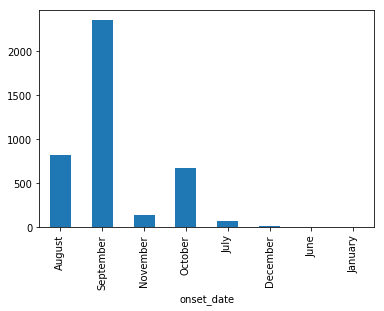

In [10]:
onsetDate = pd.to_datetime(data['total']['onset_date'], dayfirst=False)
data['total']['chartno'].groupby(onsetDate.dt.month_name(),sort=False).count().plot(kind='bar')
plt.show()

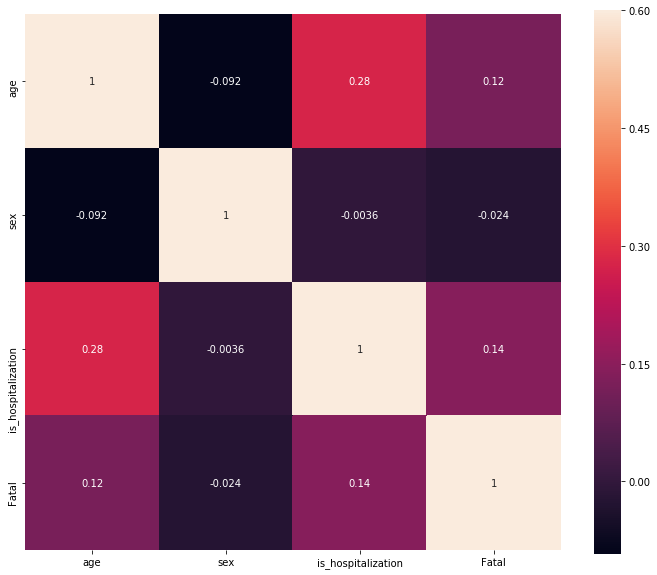

In [3]:
plt.figure(figsize=(12,10))
heatmap=sns.heatmap(data['total'].corr(), vmax=0.6, square=True, annot=True)

In [12]:
data['dead_all_info'].head()

,Unnamed: 0,chartno,age,sex,onset_date,diag_date,death_date,is_hospitalization,Fatal,min_alt_value,...,mean_alt_value,min_aptt_value,max_aptt_value,mean_aptt_value,min_ast_value,max_ast_value,mean_ast_value,min_platelet_value,max_platelet_value,mean_platelet_value
0,0,A233958,80,0,2015-09-04,2015-09-05,2015-09-07,1,1.0,66.0,...,545.500000,30.9,43.7,37.3,1441.0,1441.0,1441.00,NaN,NaN,NaN
1,1,A313823,78,0,2015-09-27,2015-09-27,2015-10-04,1,1.0,16.0,...,519.333333,55.0,55.0,55.0,47.0,11866.0,6034.00,NaN,NaN,NaN
2,2,A862906,84,1,2015-10-19,2015-10-20,2015-10-23,1,1.0,978.0,...,2447.000000,NaN,NaN,NaN,1762.0,10890.0,7400.75,7.0,19.0,13.833333
3,3,A1175572,88,0,2015-09-19,2015-09-19,2015-09-20,1,1.0,357.0,...,1817.000000,39.7,39.9,39.8,662.0,7438.0,4050.00,13.0,113.0,63.000000
4,4,A2093942,55,0,2015-09-05,2015-09-10,2015-09-11,1,1.0,17.0,...,1701.333333,71.4,71.4,71.4,4106.0,11860.0,7983.00,11.0,17.0,14.000000


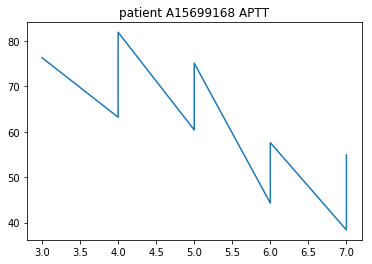

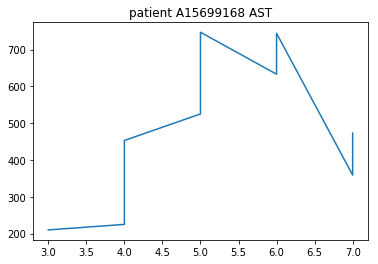

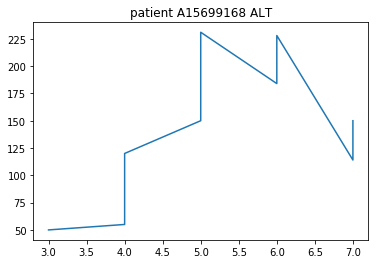

In [3]:
#plot ALT,APTT,AST,Platelet
def plotExperiment(kind,ID):
    temp=data[kind]
    temp=temp.loc[temp['chartno']==ID]
    temp=temp.sort_values(by=['Day','value'])
    plt.plot(temp['Day'],temp['value'])
    plt.title('patient '+ ID + ' ' + kind)
    plt.show()

plotExperiment('APTT','A15699168')
plotExperiment('AST','A15699168')
plotExperiment('ALT','A15699168')

23
37


<BarContainer object of 2 artists>

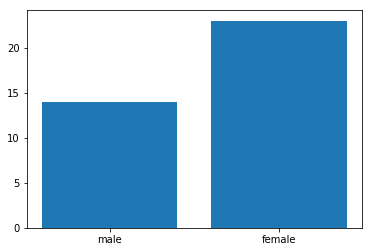

In [4]:
temp=data['total']
temp
dead=temp.loc[temp['Fatal']==1.0]
print(len(dead.loc[dead['sex']==0]))
print(len(dead))
plt.bar(['male','female'],[len(dead.loc[dead['sex']==1]),len(dead.loc[dead['sex']==0])])

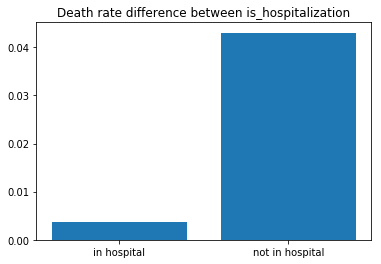

相差11.616211745244003倍


In [5]:
temp=data['total']
isHop=temp.loc[temp['is_hospitalization']==0]

deathRateHos=len(isHop.loc[isHop['Fatal']==1.0])/len(isHop)

isNotHop=temp.loc[temp['is_hospitalization']==1]
deathRateNotHos=len(isNotHop.loc[isNotHop['Fatal']==1.0])/len(isNotHop)

plt.bar(['in hospital','not in hospital'],[deathRateHos,deathRateNotHos])
plt.title('Death rate difference between is_hospitalization')
plt.show()
print("相差"+str(deathRateNotHos/deathRateHos)+"倍")